In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import get_pkg_data_filename
import glob

path_galaxy = "Bicocca-Tele.data/ngc_6946_for_29th_Sep_2025/LIGHT"
hdu = fits.open(get_pkg_data_filename(path_galaxy +"/2025-09-29_18-29-26_sci_NGC6946_R_exp300.00_0000.fits"))[0]

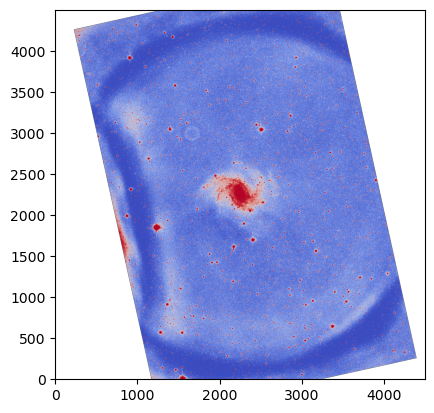

In [2]:



let = 'I'

file_galaxy = sorted(glob.glob(path_galaxy + f"/reproj_NGC6946_*{let}*.fits"))
data_galaxy = np.array([fits.getdata(f) for f in file_galaxy])
master_galaxy = np.median(data_galaxy, axis=0)

hdu_image = fits.PrimaryHDU(master_galaxy, header = hdu.header)
hdu_list_image = fits.HDUList([hdu_image])
hdu_list_image.writeto(path_galaxy + f"/master_galaxy_{let}.fits", overwrite=True)
ax = plt.subplot(1,1,1)
ax.imshow(master_galaxy, origin='lower', clim = (-10, 100), cmap = "coolwarm")
plt.show()

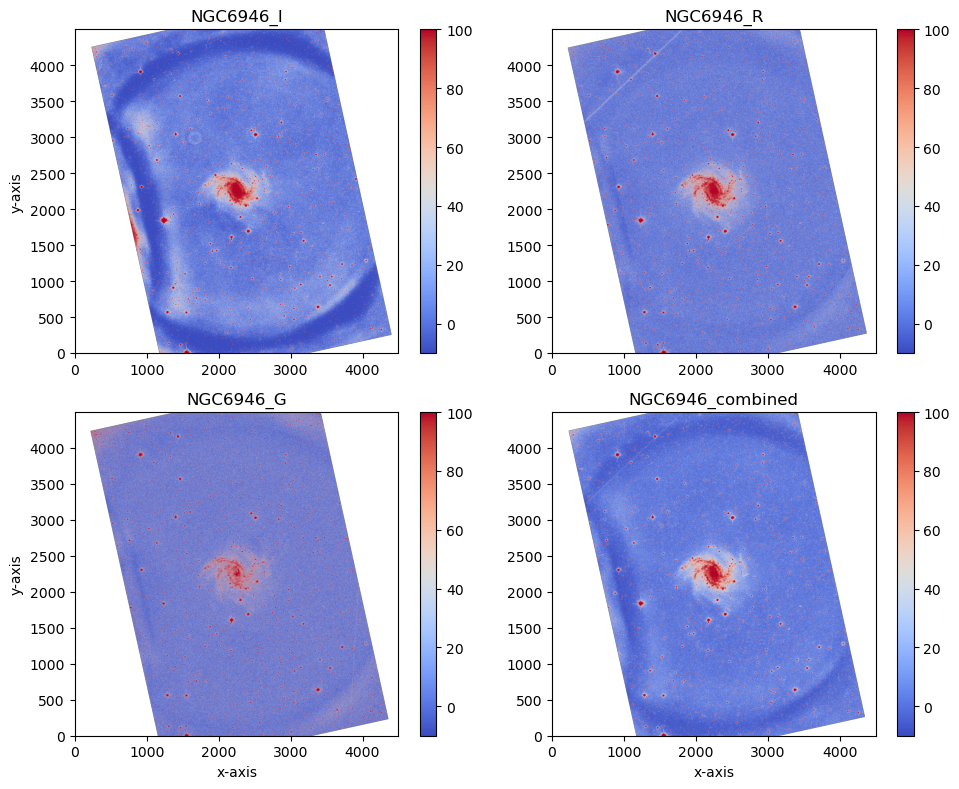

In [3]:
with fits.open(path_galaxy +"/master_galaxy_I.fits") as hdu_galaxy:
  galaxy_I = hdu_galaxy[0].data
with fits.open(path_galaxy +"/master_galaxy_G.fits") as hdu_galaxy:
  galaxy_G = hdu_galaxy[0].data 
with fits.open(path_galaxy +"/master_galaxy_R.fits") as hdu_galaxy:
  galaxy_R = hdu_galaxy[0].data
with fits.open(path_galaxy +"/master_galaxy.fits") as hdu_galaxy:
  master_galaxy = hdu_galaxy[0].data

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.imshow(galaxy_I, origin='lower' ,clim=(-10,100) , cmap = 'coolwarm') # [y1:y2 , x1:x2]   ,clim=(4000,4300)
plt.colorbar()
plt.ylabel("y-axis")
plt.title('NGC6946_I')
plt.tight_layout()

plt.subplot(2,2,2)

plt.imshow(galaxy_R , origin='lower' ,clim=(-10,100), cmap = 'coolwarm') # [y1:y2 , x1:x2]  ,cmap='gray' 
plt.colorbar()
plt.title('NGC6946_R')
plt.tight_layout()


plt.subplot(2,2,3)
plt.imshow(galaxy_G, origin='lower' ,cmap='coolwarm',clim=(-10,100)  ) # [y1:y2 , x1:x2]  ,cmap='gray' ,clim=(4000,4200)
plt.colorbar()
plt.ylabel("y-axis")
plt.xlabel("x-axis")    
plt.title('NGC6946_G')
plt.tight_layout()

plt.subplot(2,2,4)
plt.imshow(master_galaxy,clim=(-10,100), origin='lower' , cmap= 'coolwarm') # [y1:y2 , x1:x2]  ,cmap='gray' , cmap= 'coolwarm'
plt.colorbar()
plt.xlabel("x-axis")    
plt.title('NGC6946_combined')
plt.tight_layout()  
plt.show()